# Singular value decomposition (SVD)

## Geometric interpretation

The SVD has many possible interpretations and uses. We can visualize the geometry of the SVD using the same 2D picture used to illustrate the induced 2-norm.

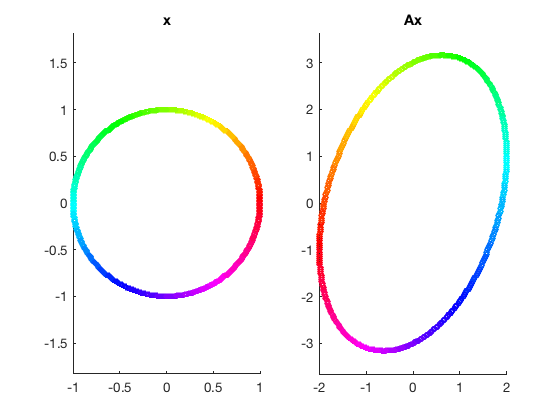

In [2]:
A = [-2 0; -1 3];
t = (0:pi/200:2*pi)';
x1 = cos(t);  x2 = sin(t);  
x = [x1';x2'];
Ax = A*x;   
subplot(1,2,1)
scatter(x1,x2,12,t) 
axis equal
title("x")
subplot(1,2,2)
scatter(Ax(1,:),Ax(2,:),12,t)
axis("equal")
title("Ax")
colormap hsv

The **left singular vectors** and their associated **singular values** are found from the major and minor axes of the ellipse. 

In [3]:
normAx = sqrt(sum(Ax.^2,1)); % 2-norms of all the vectors
[s1,k1] = max(normAx);  
[s2,k2] = min(normAx);
s = [ s1, s2 ]
U = [ Ax(:,k1)/s1 Ax(:,k2)/s2 ]


s =

    3.2566    1.8424


U =

    0.2874   -0.9593
    0.9578    0.2822



The **right singular vectors** are the pre-images of those vectors on the ellipse.

In [4]:
V = [ x(:,k1) x(:,k2) ]


V =

   -0.4679    0.8838
    0.8838    0.4679



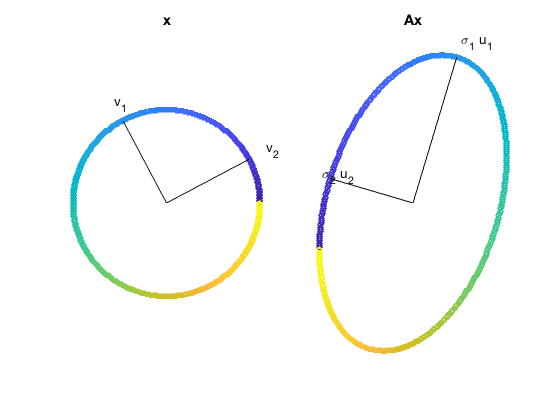

In [6]:
subplot(121)
scatter(x1,x2,12,t) 
axis("equal"), axis("off"), title("x")
hold("on")
plot([0 0; V(1,:)],[0 0; V(2,:)], "k" )
text(1.2*V(1,1),1.2*V(2,1),"v_1")
text(1.2*V(1,2),1.2*V(2,2),"v_2")

subplot(122)
scatter(Ax(1,:),Ax(2,:),12,t)
axis("equal"), axis("off"), title("Ax")
hold("on")
plot([0 0; U(1,:).*s],[0 0; U(2,:).*s], "k" )
text(1.1*U(1,1)*s1,1.1*U(2,1)*s1,"\sigma_1 u_1") 
text(1.1*U(1,2)*s2,1.1*U(2,2)*s2,"\sigma_2 u_2") 

Having searched over only a finite number of vectors, we have approximately (up to choices of signs in the singular vectors) found the SVD of this matrix.

In [7]:
[U,S,V] = svd(A)


U =

    0.2898    0.9571
    0.9571   -0.2898


S =

    3.2566         0
         0    1.8424


V =

   -0.4719   -0.8817
    0.8817   -0.4719



## Full versus thin

In the case of a rectangular matrix, some of the SVD is essentially dead weight. We consider (as always in this text) the case with $m>n$, a tall and skinny matrix. The range of $A$ can have at most only $n$ dimensions. The last $m-n$ columns of $U$ therefore describe the remainder of $\mathbb{C}^m$ in which the range is embedded (i.e., the orthogonal complement). That description can be changed without affecting the matrix at all.

Algebraically, we have 

$$U = \bigl[ U_1 \: U_2 \bigr], \qquad S = \begin{bmatrix} S_1 \\ 0 \end{bmatrix},$$

where the breaks occur after $n$ columns in $U$ and $n$ rows in $S$. Therefore $US=U_1S_1$, and we change nothing by replacing the SVD with $U_1S_1V^*$. The book calls this the **reduced SVD**, though it is also called the **thin SVD**. 

In [9]:
A = rand(6,3); 
[U,S,V] = svd(A);  % full SVD, by default
U 


U =

   -0.4360   -0.2481   -0.6419    0.3068   -0.4848    0.0844
   -0.4139   -0.3658    0.0391   -0.7713   -0.0349   -0.3120
   -0.4254    0.5159    0.0610    0.2613    0.0834   -0.6884
   -0.4385   -0.3189    0.7227    0.3450   -0.1445    0.2094
   -0.2543   -0.3155   -0.2428    0.2029    0.8540    0.0798
   -0.4480    0.5807   -0.0388   -0.2872    0.0814    0.6095



In [10]:
[U1,S1,V1] = svd(A,0);  % thin SVD
U1


U1 =

   -0.4360   -0.2481   -0.6419
   -0.4139   -0.3658    0.0391
   -0.4254    0.5159    0.0610
   -0.4385   -0.3189    0.7227
   -0.2543   -0.3155   -0.2428
   -0.4480    0.5807   -0.0388



The price we pay is that while the columns of $U_1$ are orthonormal, we can't call it a unitary matrix because it isn't square. Take note:

In [12]:
U1'*U1           % n by n identity


ans =

    1.0000   -0.0000    0.0000
   -0.0000    1.0000   -0.0000
    0.0000   -0.0000    1.0000



In [13]:
U1*U1'           % NOT the m by m identity


ans =

    0.6637    0.2461    0.0184   -0.1936    0.3450    0.0761
    0.2461    0.3066   -0.0103    0.3264    0.2112   -0.0286
    0.0184   -0.0103    0.4509    0.0661   -0.0694    0.4878
   -0.1936    0.3264    0.0661    0.8162    0.0367   -0.0168
    0.3450    0.2112   -0.0694    0.0367    0.2232   -0.0599
    0.0761   -0.0286    0.4878   -0.0168   -0.0599    0.5394



We'll discuss the significance of $U_1U_1^*$ in due course.

## Dimension reduction

We're all swimming in data, and the SVD provides a way to reduce large data sets to its most essential components. 

Here we load data about all the votes made in the U.S. House of Representatives during the 111th Congress. 

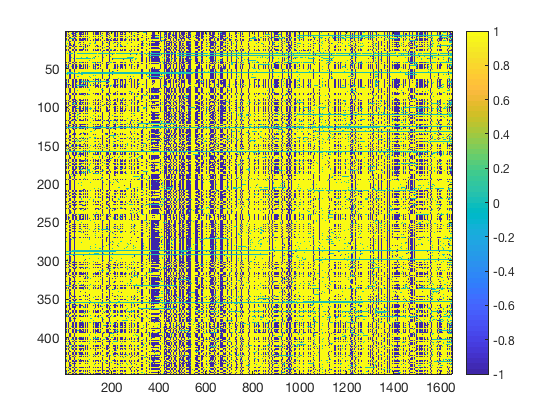

In [15]:
load hou111kh
imagesc(A); colorbar;

The rows represent voters, the columns represent bills or other vote items, and the color shows the vote: +1 is 'yea', -1 is 'nay', and 0 is 'no vote'. Each row is the fingerprint of a particular representative. As you can easily see, there is a great deal of dependence among those rows, indicating party affiliation.

Extracting meaning from the data is a bit cleaner if we use the difference of each vote from the voter's average vote.

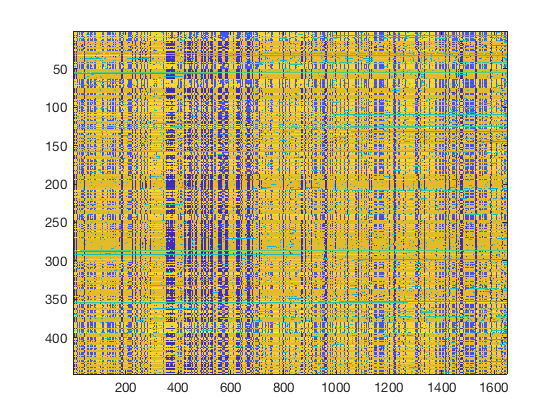

In [17]:
mu = mean(A,2);  
A = A - mu;  % subtract each voter's average from all votes
imagesc(A);

Just at a glance, you can see many similar columns within the matrix. That implies that it is close to something of lower rank, and the SVD is one way to find such an approximation. 

Note that the "thin" SVD wants a matrix that is taller than wide, so we have to transpose $A$.

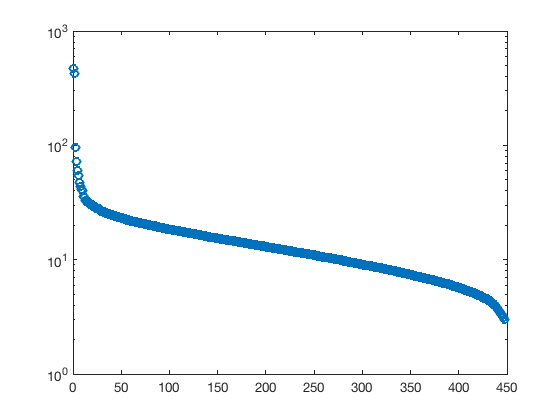

In [18]:
[V,S,U] = svd(A',0);   
semilogy(diag(S),"o");

The sharp drop after $\sigma_2$ suggests that a rank-2 approximation might be reasonable. This makes some retroactive sense: in a perfectly rigid two-party system, every column would be a copy of the party line, and rank-2 would catch it all. 

The leading singular vectors have interesting interpretations.  

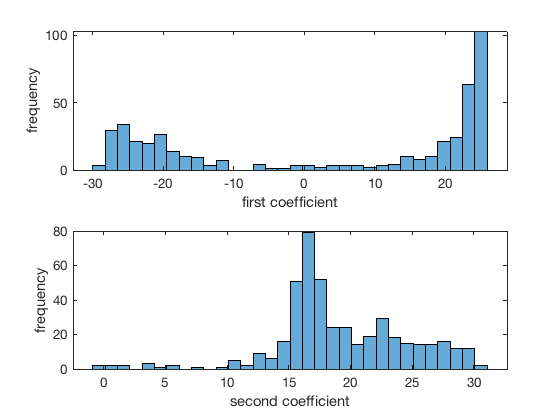

In [20]:
x1 = S(1,1)*U(:,1);   x2 = -S(2,2)*U(:,2);
subplot(211); histogram(x1,32)
xlabel("first coefficient"), ylabel("frequency")
subplot(212); histogram(x2,32)
xlabel("second coefficient"), ylabel("frequency");

The first vector indicates "which side" you are on; either you strongly agree with some canonical set of positions, strongly oppose, or (less commonly) don't much correlate with it. The second vector indicates how much you are willing to depart from the party and vote with the other side. We can plot each member's coordinates in this abstract plane. The color indicates the member's real-life party affiliation.

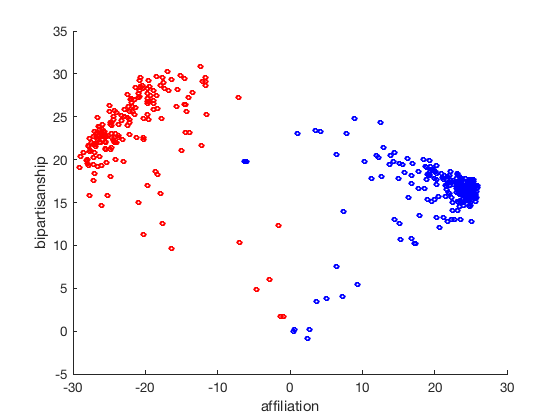

In [23]:
colr = repmat([0,0,1],length(x1),1);
colr(party==2,1) = 1;  colr(party==2,3) = 0;
scatter(x1,x2,10,colr)
xlabel("affiliation"); ylabel("bipartisanship");